In [1]:
# import libraries


import numpy as np
import pandas as pd
# Import modules
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df  = pd.read_csv("Dataset.csv")
df.head()

,Unnamed: 0,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,...,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
0,0,5099,1,5,156,35,-2,1,40,999,...,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49,0
1,1,5191,0,1,164,16,1,5,4,999,...,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21,0
2,2,5228,1,0,774,75,1,5,12,999,...,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21,0
3,3,5228,1,1,747,4,1,5,69,999,...,0.11,1048,4,17,-0.31,39,-0.18,-0.10,-0.21,0
4,4,5196,1,5,29,28,0,4,32,999,...,0.11,993,22,58,-0.31,492,0.02,-0.10,0.21,0


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,x_2,...,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
0,5099,1,5,156,35,-2,1,40,999,7,...,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49,0
1,5191,0,1,164,16,1,5,4,999,5,...,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21,0
2,5228,1,0,774,75,1,5,12,999,4,...,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21,0
3,5228,1,1,747,4,1,5,69,999,3,...,0.11,1048,4,17,-0.31,39,-0.18,-0.10,-0.21,0
4,5196,1,5,29,28,0,4,32,999,6,...,0.11,993,22,58,-0.31,492,0.02,-0.10,0.21,0


In [4]:
# X and y
X = df.drop('y', axis=1) # features / input
y = df['y'].values  # target

In [5]:
X.head()

,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,x_2,...,x_71,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99
0,5099,1,5,156,35,-2,1,40,999,7,...,1,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49
1,5191,0,1,164,16,1,5,4,999,5,...,0,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21
2,5228,1,0,774,75,1,5,12,999,4,...,0,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21
3,5228,1,1,747,4,1,5,69,999,3,...,1,0.11,1048,4,17,-0.31,39,-0.18,-0.10,-0.21
4,5196,1,5,29,28,0,4,32,999,6,...,0,0.11,993,22,58,-0.31,492,0.02,-0.10,0.21


# Removing Duplicate Columns

In [6]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [7]:
duplicate_columns = get_duplicate_columns(X)
duplicate_columns

{}

*there are no duplicate columns*

# univariate analysis

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#### kde plots

c:\Users\Admin\miniconda3\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


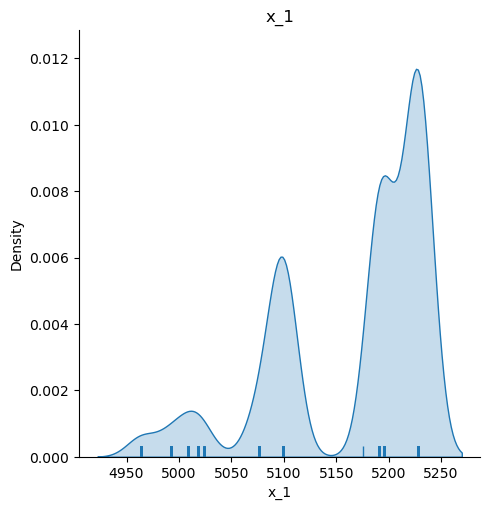

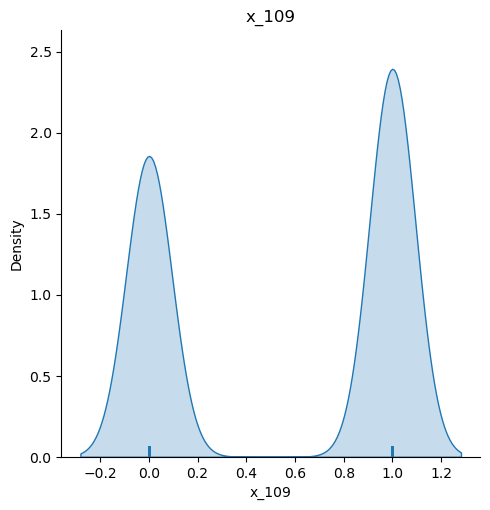

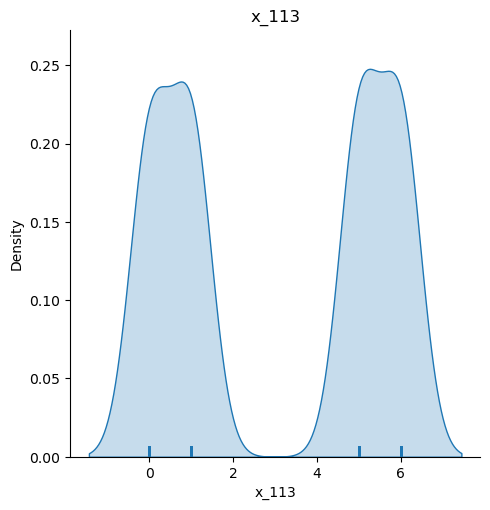

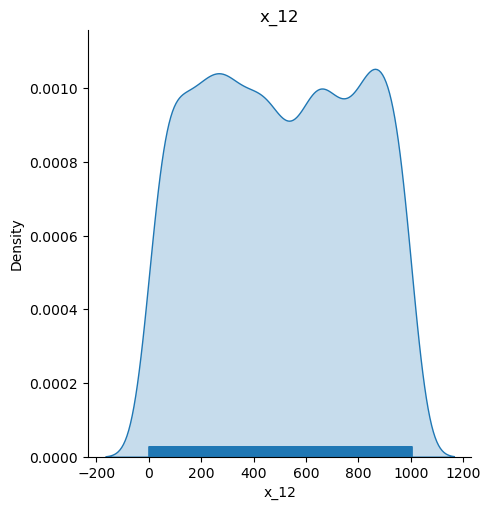

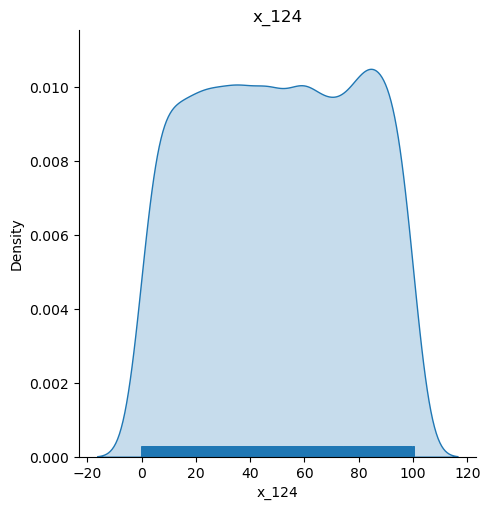

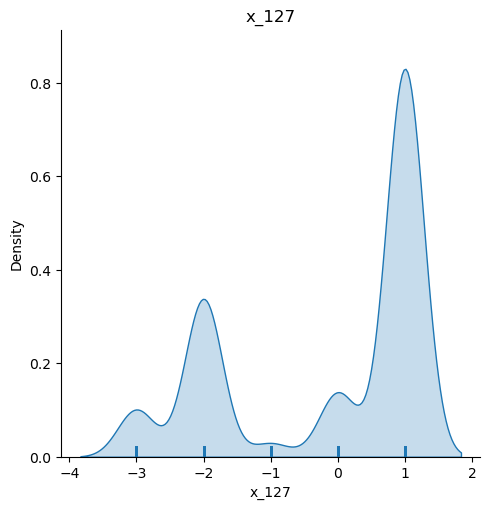

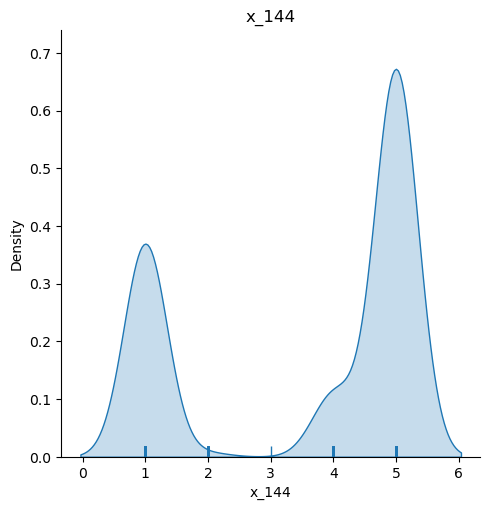

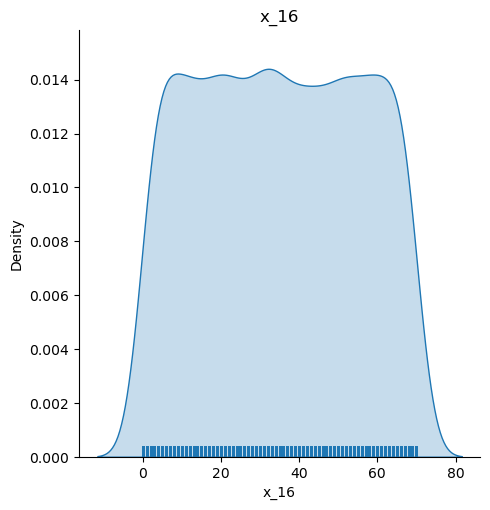

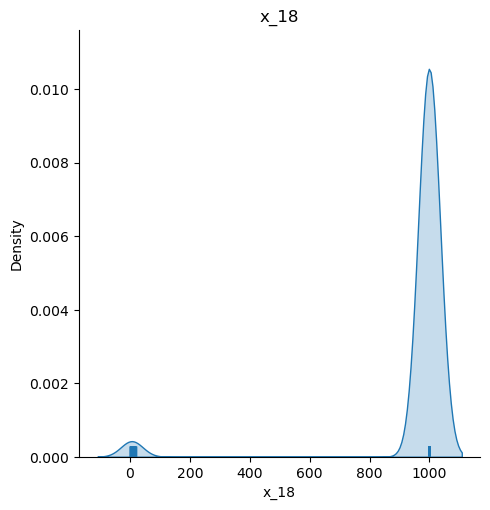

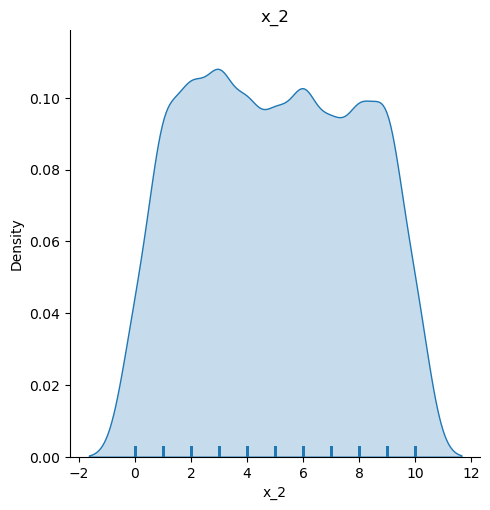

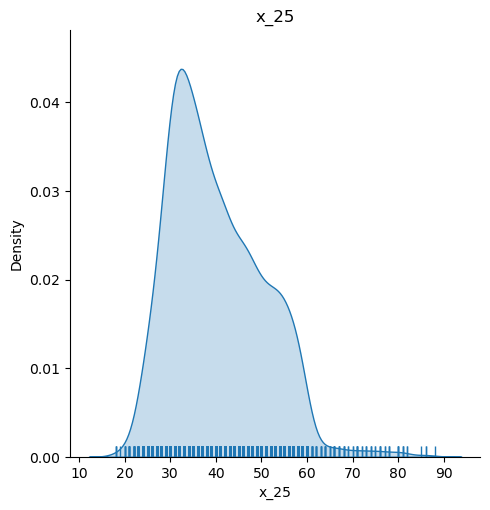

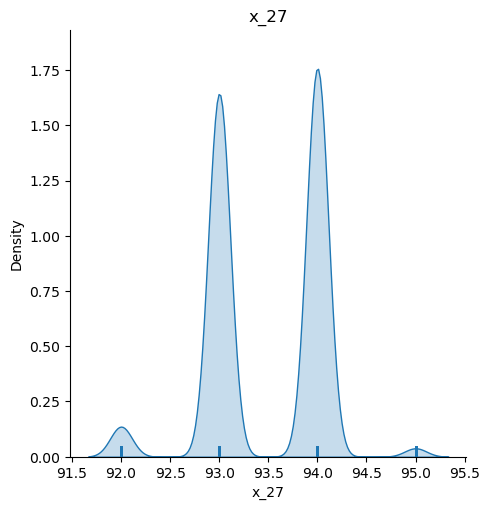

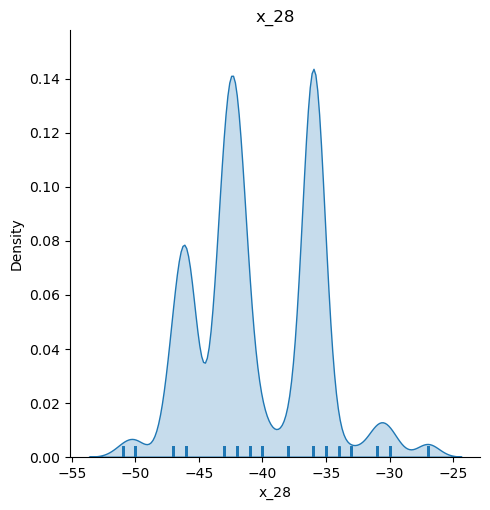

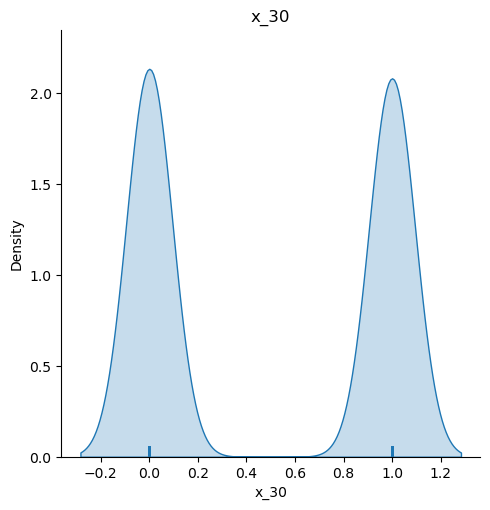

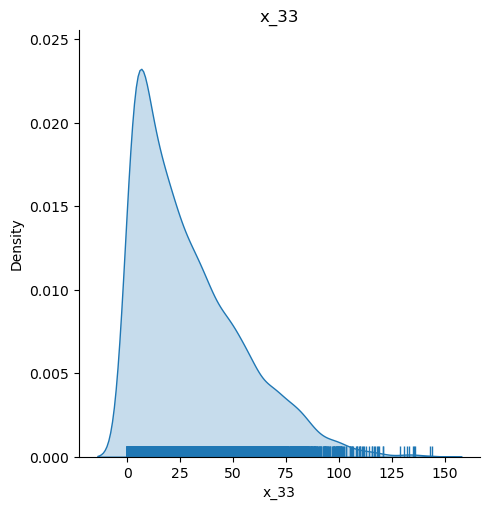

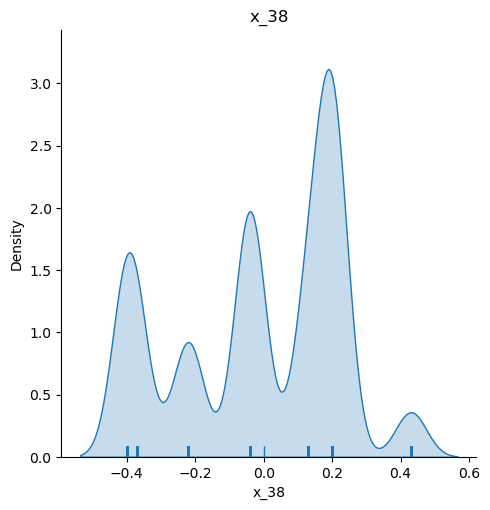

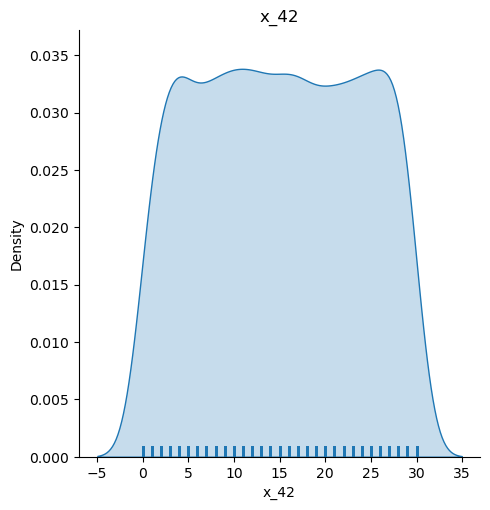

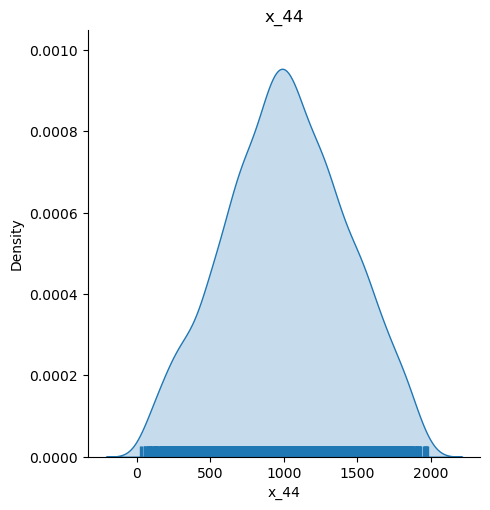

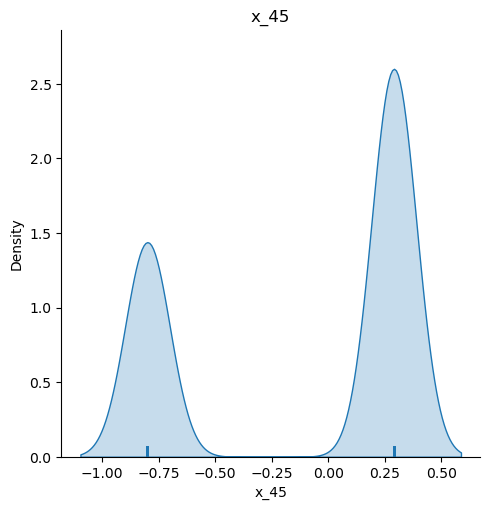

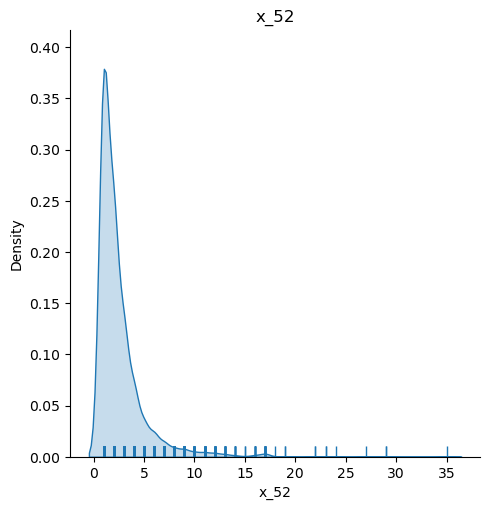

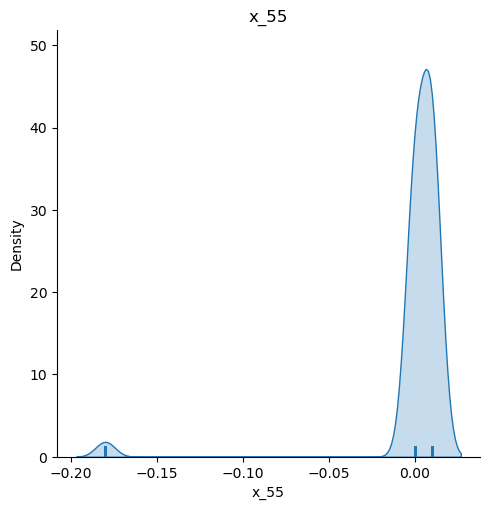

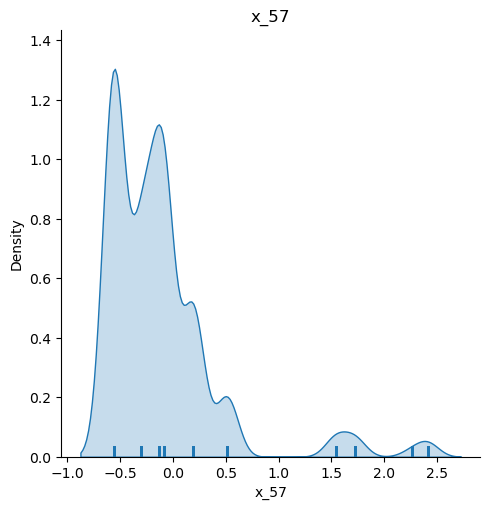

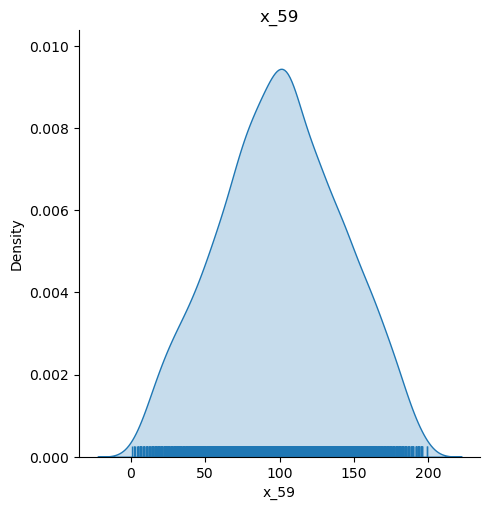

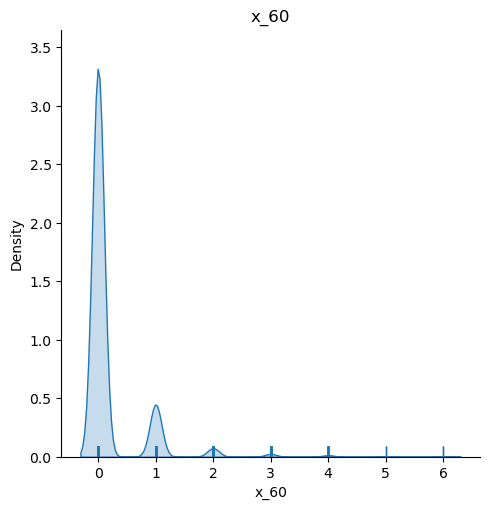

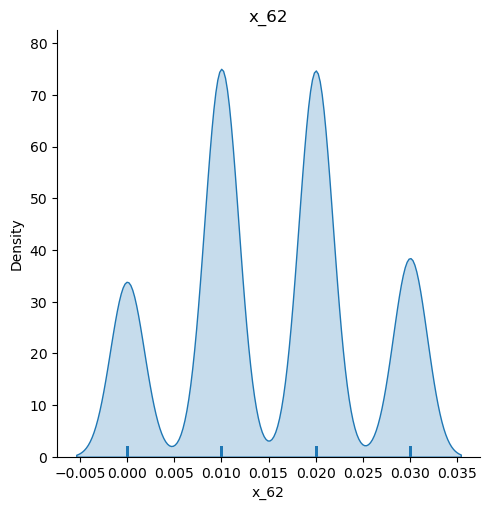

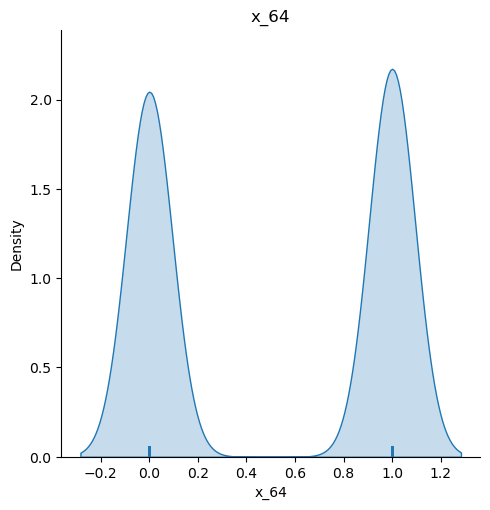

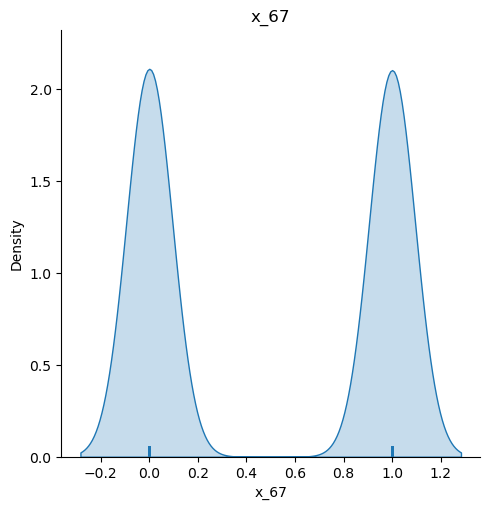

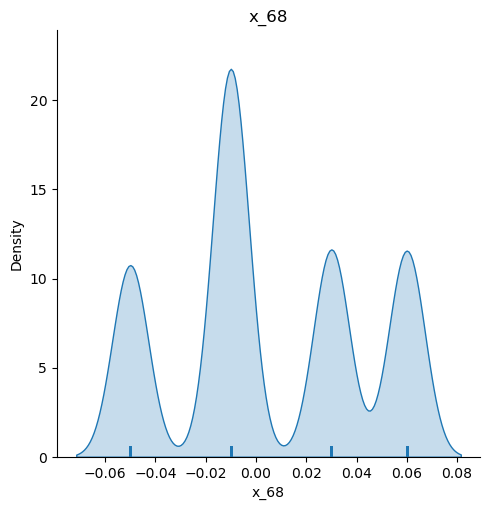

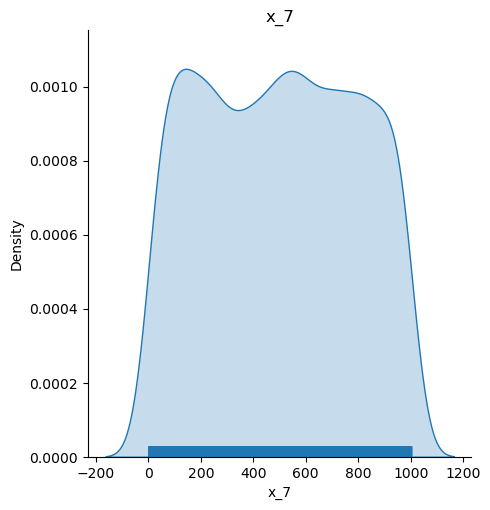

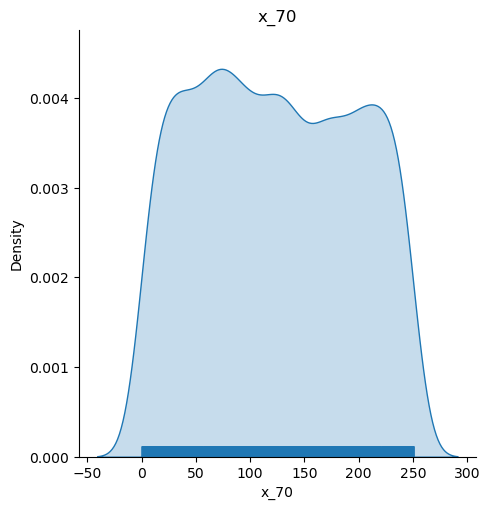

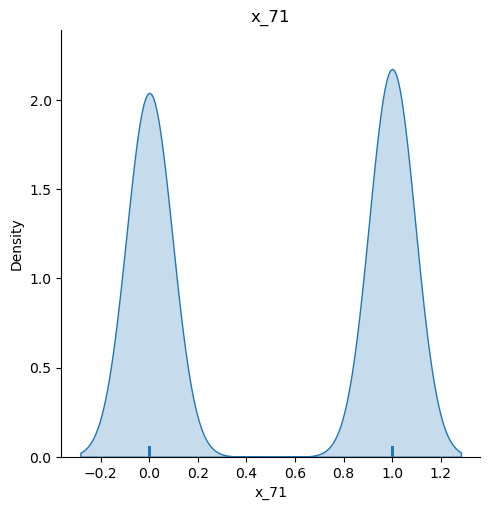

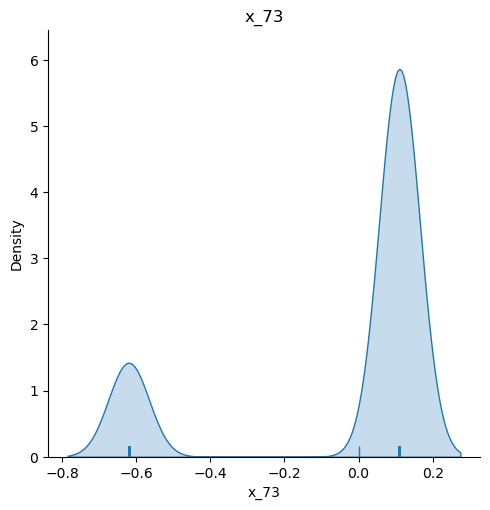

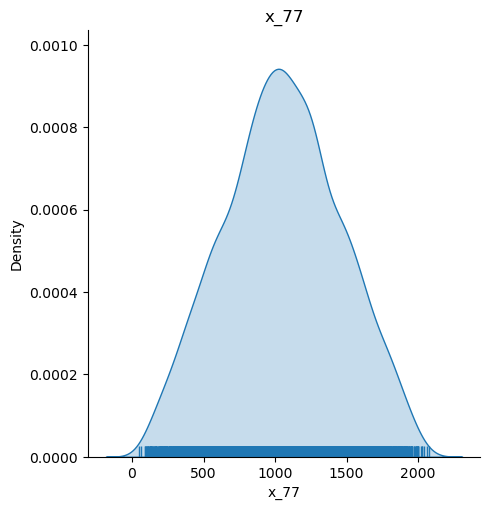

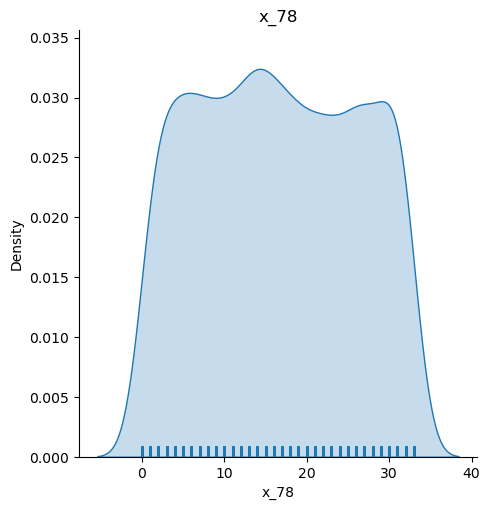

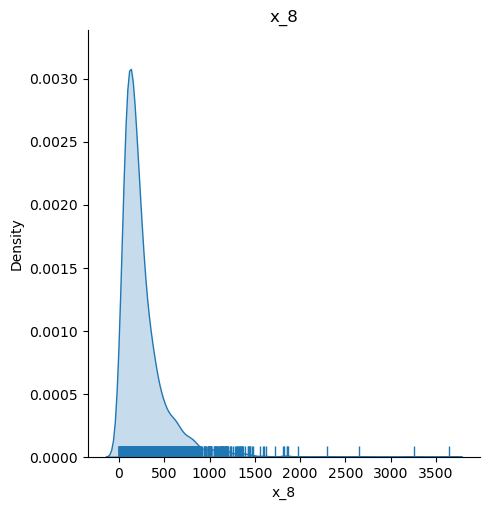

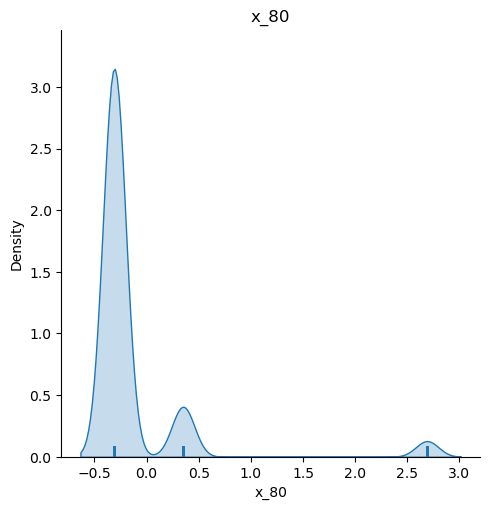

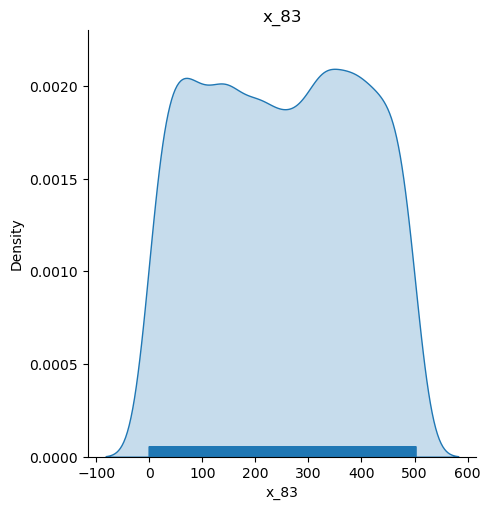

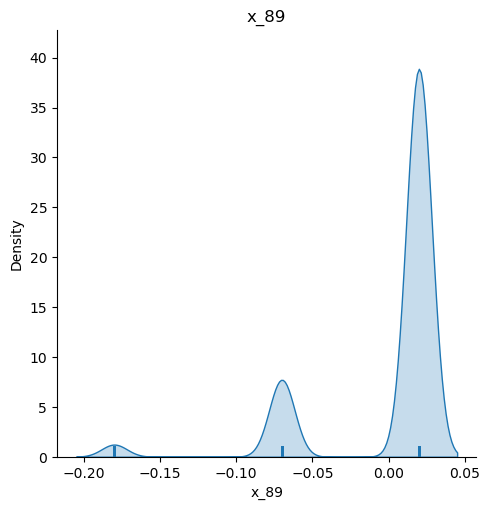

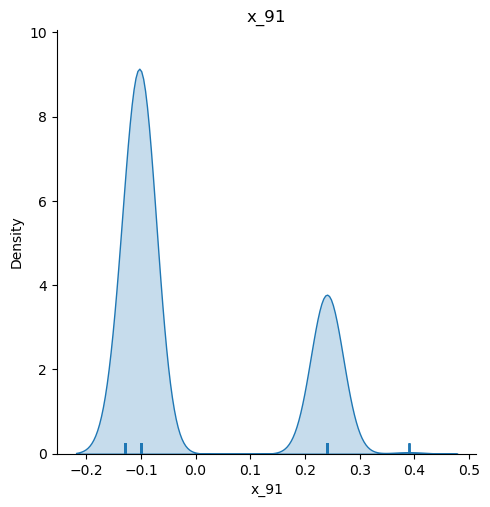

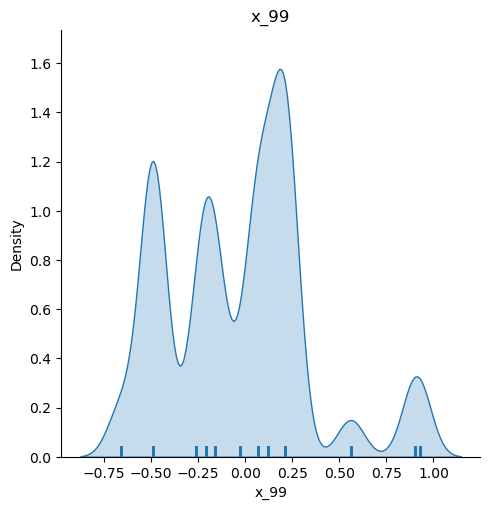

In [9]:
# kde plot
columns = X.columns
for col in columns:

    sns.displot(data=X, x=col, kind= 'kde', fill =True, rug=True).set(title= col)

from the above plots it is clear that some of the features are catoegorical. we need to find features which are categorical and which are not categorical.



### find categorical features

In [10]:
for col in columns:
    print(f"col: {col} , value_counts: {X[col].value_counts()}")
    print("***************")

col: x_1 , value_counts: x_1
5228    1626
5099     823
5191     758
5196     392
5076     164
5018     104
4992      87
4964      83
5009      60
5024      21
5176       1
Name: count, dtype: int64
***************
col: x_109 , value_counts: x_109
1    2320
0    1799
Name: count, dtype: int64
***************
col: x_113 , value_counts: x_113
5    1055
6    1043
1    1025
0     996
Name: count, dtype: int64
***************
col: x_12 , value_counts: x_12
356    13
854    12
860    12
284    11
420    10
       ..
352     1
484     1
611     1
346     1
564     1
Name: count, Length: 990, dtype: int64
***************
col: x_124 , value_counts: x_124
37     55
45     55
60     52
99     51
3      50
       ..
17     32
7      31
74     28
100    19
0      16
Name: count, Length: 101, dtype: int64
***************
col: x_127 , value_counts: x_127
 1    2384
-2     970
 0     393
-3     289
-1      83
Name: count, dtype: int64
***************
col: x_144 , value_counts: x_144
5    2392
1    1317

given no description about the dataset and feature types we can only assume that features which are having 0 and 1 are categorical and others non-categorical. some features has discrete values but we cannot interpret them as categorical or otherwise since we don't have feature description.

categorical features: x_71, x_67, x_64, x_30, x_109

In [11]:
cat_features = ['x_71', 'x_67', 'x_64', 'x_30', 'x_109']
non_cat_features = [col for col in columns if col not in cat_features]

# variance threshold method

In [24]:
# split into train test and normalise the features
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 48 , stratify=y)


# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
MinMax_scaler = MinMaxScaler()
MinMax_scaler.fit(X_train)

MinMaxScaler()

In [25]:
X_train_scaled = MinMax_scaler.transform(X_train)
X_test_scaled = MinMax_scaler.transform(X_test)

In [27]:
## convert to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [28]:
X_train_scaled.head()

,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,x_2,...,x_71,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99
0,0.511364,1.0,0.833333,0.570571,0.64,0.25,0.00,0.071429,1.000000,0.0,...,0.0,1.0,0.537968,0.272727,0.006148,0.0,0.512,1.00,0.711538,0.459119
1,0.106061,0.0,1.000000,0.655656,0.23,0.25,0.00,0.942857,0.003003,0.8,...,0.0,1.0,0.792899,0.606061,0.044574,1.0,0.912,1.00,0.057692,0.314465
2,0.878788,0.0,0.833333,0.079079,0.48,0.75,0.75,0.514286,1.000000,0.3,...,1.0,1.0,0.698225,0.606061,0.311712,0.0,0.656,1.00,0.057692,0.547170
3,0.878788,1.0,1.000000,0.903904,0.31,0.75,0.75,0.957143,1.000000,0.6,...,1.0,1.0,0.446252,0.848485,0.081463,0.0,0.854,1.00,0.057692,0.314465
4,1.000000,0.0,0.166667,0.002002,0.63,1.00,1.00,0.828571,1.000000,1.0,...,0.0,1.0,0.495069,0.272727,0.032585,0.0,0.676,0.55,0.000000,0.547170


In [87]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [88]:
sel.fit(X_train_scaled)

VarianceThreshold(threshold=0.05)

In [89]:
sum(sel.get_support())

25

In [90]:
print('number of columns which are static or quasi static (below variance threshold) = ', X_train.shape[1] - sum(sel.get_support()))

number of columns which are static or quasi static (below variance threshold) =  15


*so there are 15 features whose variance is less than 0.05. it means they are either static or quasi-static* 

In [93]:
VT_columns = X_train_scaled.columns[sel.get_support()]
print('columns which has variance more than 0.05')
VT_columns

columns which has variance more than 0.05


Index(['x_1', 'x_109', 'x_113', 'x_12', 'x_124', 'x_127', 'x_144', 'x_16',
       'x_2', 'x_30', 'x_38', 'x_42', 'x_45', 'x_62', 'x_64', 'x_67', 'x_68',
       'x_7', 'x_70', 'x_71', 'x_73', 'x_78', 'x_83', 'x_91', 'x_99'],
      dtype='object')

In [94]:
len(VT_columns)

25

In [98]:
## create a dataframe where only above selected columns are present.

X_train_VT = sel.transform(X_train_scaled)
X_test_VT = sel.transform(X_test_scaled)

X_train_VT = pd.DataFrame(X_train_VT, columns=VT_columns)
X_test_VT = pd.DataFrame(X_test_VT, columns=VT_columns)

X_train_VT.head()

,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_2,x_30,...,x_67,x_68,x_7,x_70,x_71,x_73,x_78,x_83,x_91,x_99
0,0.511364,1.0,0.833333,0.570571,0.64,0.25,0.00,0.071429,0.0,0.0,...,0.0,0.727273,0.803804,0.024,0.0,1.0,0.272727,0.512,0.711538,0.459119
1,0.106061,0.0,1.000000,0.655656,0.23,0.25,0.00,0.942857,0.8,1.0,...,1.0,1.000000,0.314314,0.232,0.0,1.0,0.606061,0.912,0.057692,0.314465
2,0.878788,0.0,0.833333,0.079079,0.48,0.75,0.75,0.514286,0.3,0.0,...,1.0,0.363636,0.173173,0.772,1.0,1.0,0.606061,0.656,0.057692,0.547170
3,0.878788,1.0,1.000000,0.903904,0.31,0.75,0.75,0.957143,0.6,1.0,...,0.0,0.000000,0.857858,0.956,1.0,1.0,0.848485,0.854,0.057692,0.314465
4,1.000000,0.0,0.166667,0.002002,0.63,1.00,1.00,0.828571,1.0,0.0,...,1.0,0.727273,0.443443,0.000,0.0,1.0,0.272727,0.676,0.000000,0.547170


### correlation

<Axes: >

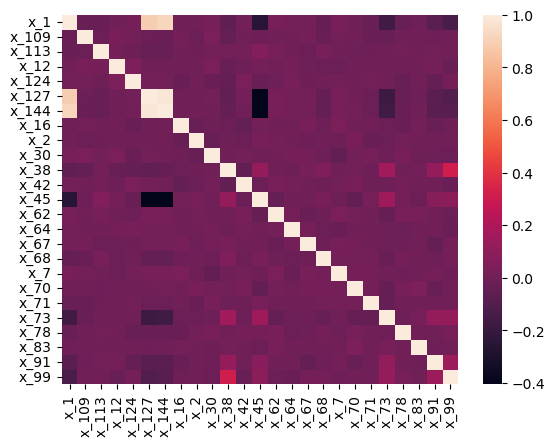

In [101]:
sns.heatmap(X_train_VT.corr())

In [102]:
corr_matrix = X_train_VT.corr()

In [104]:
corr_matrix.shape

(25, 25)

In [107]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
columns_to_drop2 = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])
            columns_to_drop2.append(columns[i])

print(len(columns_to_drop))

1


In [109]:
columns_to_drop, columns_to_drop2

(['x_144'], ['x_127'])

In [110]:
corr_matrix.loc[columns_to_drop[0], columns_to_drop2[0]]

0.9788529062568109

**(['x_144'], ['x_127']) are highly correlated:**
remove any one of them.

In [115]:
# find which column has least correlation with target variable y

corr_x_144 = np.corrcoef(X_train_VT['x_144'].values,y_train )
corr_x_127 = np.corrcoef(X_train_VT['x_127'].values, y_train)

print(f"x_144 --> {corr_x_144[0,1]}, x_127 --> {corr_x_127[0,1]}")

x_144 --> -0.28327504839477485, x_127 --> -0.29204776662101534


x_127 is more correlated with target variable. We can also check VIR of both the columns before deciding which one to eliminate.

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [119]:
VT_columns

Index(['x_1', 'x_109', 'x_113', 'x_12', 'x_124', 'x_127', 'x_144', 'x_16',
       'x_2', 'x_30', 'x_38', 'x_42', 'x_45', 'x_62', 'x_64', 'x_67', 'x_68',
       'x_7', 'x_70', 'x_71', 'x_73', 'x_78', 'x_83', 'x_91', 'x_99'],
      dtype='object')

In [121]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["cols: no x_127"] = [item for item in VT_columns if item != "x_127"]

# calculating VIF for each feature 
vif_data["VIF: no x_127"] = [variance_inflation_factor(X_train_VT.drop('x_127', axis=1).values, i) 
						for i in range(len(VT_columns)-1)] 

vif_data["cols: no x_144"] = [item for item in VT_columns if item != "x_144"]

# calculating VIF for each feature 
vif_data["VIF: no x_144"] = [variance_inflation_factor(X_train_VT.drop('x_144', axis=1).values, i) 
						for i in range(len(VT_columns) -1)] 

print(vif_data)


   cols: no x_127  VIF: no x_127 cols: no x_144  VIF: no x_144
0             x_1      51.254012            x_1      41.453629
1           x_109       2.239928          x_109       2.232836
2           x_113       2.376129          x_113       2.373391
3            x_12       3.850204           x_12       3.838611
4           x_124       3.895243          x_124       3.872434
5           x_144      22.854341          x_127      27.718907
6            x_16       3.709348           x_16       3.695747
7             x_2       3.760674            x_2       3.746068
8            x_30       1.963876           x_30       1.956159
9            x_38       4.200952           x_38       4.201911
10           x_42       3.816896           x_42       3.799097
11           x_45       3.932558           x_45       3.596438
12           x_62       3.513842           x_62       3.499777
13           x_64       2.045375           x_64       2.043559
14           x_67       1.969122           x_67       1

Above: we have calculated VIF for x_127 and x_144 by creating two separate dataframe such that excluding either one of them so that VIF of x_127 should not have effect of x_144 and vice-versa. it shows that VIF of x_144 and x_127 is far higher than  5. that implies these two features possess multicollinearity. so its better to drop both of them. 

In [122]:
X_train_1 = X_train_VT.drop(['x_144', 'x_127'], axis =1)
X_test_1 = X_test_VT.drop(['x_144', 'x_127'], axis=1)

columns_1 = X_train_1.columns
columns_1

Index(['x_1', 'x_109', 'x_113', 'x_12', 'x_124', 'x_16', 'x_2', 'x_30', 'x_38',
       'x_42', 'x_45', 'x_62', 'x_64', 'x_67', 'x_68', 'x_7', 'x_70', 'x_71',
       'x_73', 'x_78', 'x_83', 'x_91', 'x_99'],
      dtype='object')

In [123]:
len(columns_1)

23

### variance inflation factor

In [124]:
# VIF dataframe 
vif_data_1 = pd.DataFrame() 
vif_data_1["feature"] = columns_1

# calculating VIF for each feature 
vif_data_1["VIF"] = [variance_inflation_factor(X_train_1.values, i) 
						for i in range(len(columns_1))] 

print(vif_data_1)


   feature       VIF
0      x_1  7.345953
1    x_109  2.232554
2    x_113  2.373391
3     x_12  3.838513
4    x_124  3.871642
5     x_16  3.695684
6      x_2  3.746003
7     x_30  1.955267
8     x_38  4.195209
9     x_42  3.798789
10    x_45  2.981219
11    x_62  3.499622
12    x_64  2.043303
13    x_67  1.967384
14    x_68  3.026510
15     x_7  3.847109
16    x_70  3.704489
17    x_71  2.000571
18    x_73  4.972331
19    x_78  3.805794
20    x_83  3.725590
21    x_91  1.688207
22    x_99  4.051424


**VIF of x_1 is larger than 5. hence it possess multicollinearity. drop it**

In [125]:
X_train_2 = X_train_1.drop(['x_1'], axis =1)
X_test_2 = X_test_1.drop(['x_1'], axis=1)

columns_2 = X_train_2.columns
columns_2

Index(['x_109', 'x_113', 'x_12', 'x_124', 'x_16', 'x_2', 'x_30', 'x_38',
       'x_42', 'x_45', 'x_62', 'x_64', 'x_67', 'x_68', 'x_7', 'x_70', 'x_71',
       'x_73', 'x_78', 'x_83', 'x_91', 'x_99'],
      dtype='object')

In [126]:
len(columns_2)

22

# smote

SMOTE Oversampling the minority class for Training Set

In [130]:
X_2 = X[columns_2]
X_2

,x_109,x_113,x_12,x_124,x_16,x_2,x_30,x_38,x_42,x_45,...,x_67,x_68,x_7,x_70,x_71,x_73,x_78,x_83,x_91,x_99
0,1,5,156,35,40,7,1,-0.40,26,0.29,...,1,-0.01,220,237,1,0.11,14,115,-0.10,-0.49
1,0,1,164,16,4,5,0,-0.04,24,-0.80,...,1,-0.01,871,220,0,0.11,26,317,0.24,-0.21
2,1,0,774,75,12,4,0,-0.04,12,-0.80,...,1,-0.05,415,130,0,0.11,30,464,-0.10,-0.21
3,1,1,747,4,69,3,0,-0.40,22,-0.80,...,0,-0.01,794,226,1,0.11,4,39,-0.10,-0.21
4,1,5,29,28,32,6,0,0.20,4,0.29,...,1,0.06,308,49,0,0.11,22,492,-0.10,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1,5,197,82,6,4,0,-0.37,29,0.29,...,1,0.03,916,27,1,0.11,23,474,-0.10,0.21
4115,1,5,949,72,2,6,1,-0.04,22,-0.80,...,0,-0.01,634,82,1,0.11,6,475,-0.10,0.21
4116,1,1,478,41,25,1,1,-0.04,4,0.29,...,1,0.06,636,34,0,0.11,16,210,0.24,0.93
4117,1,0,554,36,68,0,0,-0.04,11,0.29,...,1,-0.01,941,88,0,0.11,21,49,-0.10,0.21


In [133]:
!pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   -------------------- ------------------- 122.9/235.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  235.5/235.6 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.8 MB/s eta 0:00:00


In [134]:
from imblearn.over_sampling import SMOTE
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X_2,y, test_size = 0.2, random_state = 48 , stratify=y)

In [135]:
# scaling --> minmax scaling

MinMax_scaler = MinMaxScaler()
MinMax_scaler.fit(X_train)

MinMaxScaler()

In [137]:
X_train_scaled_1 = MinMax_scaler.transform(X_train)
X_test_scaled_1 = MinMax_scaler.transform(X_test)

# conver to dataframe

X_train_scaled_1_df = pd.DataFrame(X_train_scaled_1, columns = columns_2)
X_test_scaled_1_df = pd.DataFrame(X_test_scaled_1, columns = columns_2)

X_train_scaled_1_df.head()

,x_109,x_113,x_12,x_124,x_16,x_2,x_30,x_38,x_42,x_45,...,x_67,x_68,x_7,x_70,x_71,x_73,x_78,x_83,x_91,x_99
0,1.0,0.833333,0.570571,0.64,0.071429,0.0,0.0,0.000000,0.833333,1.0,...,0.0,0.727273,0.803804,0.024,0.0,1.0,0.272727,0.512,0.711538,0.459119
1,0.0,1.000000,0.655656,0.23,0.942857,0.8,1.0,0.722892,0.700000,1.0,...,1.0,1.000000,0.314314,0.232,0.0,1.0,0.606061,0.912,0.057692,0.314465
2,0.0,0.833333,0.079079,0.48,0.514286,0.3,0.0,0.722892,0.466667,1.0,...,1.0,0.363636,0.173173,0.772,1.0,1.0,0.606061,0.656,0.057692,0.547170
3,1.0,1.000000,0.903904,0.31,0.957143,0.6,1.0,0.722892,0.466667,1.0,...,0.0,0.000000,0.857858,0.956,1.0,1.0,0.848485,0.854,0.057692,0.314465
4,0.0,0.166667,0.002002,0.63,0.828571,1.0,0.0,0.638554,0.233333,0.0,...,1.0,0.727273,0.443443,0.000,0.0,1.0,0.272727,0.676,0.000000,0.547170


In [145]:
## checking dataset balance

_, count = np.unique(y_train, return_counts=True)
count

array([2934,  361], dtype=int64)

In [141]:
## clearly there is class imbalance. Use SMOTE to balance the dataset
# Oversampling the training dataset only
oversample = SMOTE()
X_train_scaled_1_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train_scaled_1_df, y_train)

In [146]:
_, count = np.unique(y_train_SMOTE, return_counts=True)
count

array([2934, 2934], dtype=int64)

now the classes are balanced

In [ ]:
# fit the model to random forest and find the feature importances

